In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv',header=None,delimiter=r'\s+',names=col)

In [3]:
X=pd.DataFrame({"RM":(data['RM']),"LSTAT":(data['LSTAT'])})
X_poly=pd.DataFrame({"RM":np.log(data['RM']),"LSTAT":np.log(data['LSTAT'])})
y=data['MEDV']

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

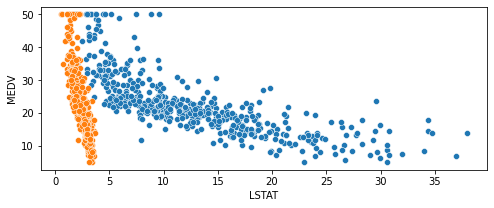

In [4]:
plt.figure(figsize=(8,3))
sns.scatterplot(X.iloc[:,1],y)
sns.scatterplot(X_poly.iloc[:,1],y)

<h4>LSTAT now become linear after np.log(data['LSTAT'])</h4>
<br>shown in second plot

Text(0.5, 1.0, 'poly features')

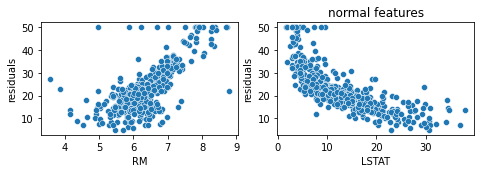

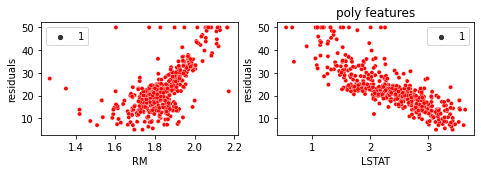

In [5]:
j=1
plt.figure(figsize=(12,12))
for i in X:
    # print(i)
    plt.subplot(5,3,j)
    sns.scatterplot(X[i],y)
    plt.ylabel('residuals')
    j+=1
plt.title('normal features')

j=1
plt.figure(figsize=(12,12))
for i in X_poly:
    # print(i)
    plt.subplot(5,3,j)
    sns.scatterplot(X_poly[i],y,color='red',markers='.',size=1)
    plt.ylabel('residuals')
    j+=1
plt.title('poly features')


In [6]:
lr = LinearRegression()

<h3>R2 with normal feature</h3>

In [7]:
from sklearn.metrics import r2_score

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
print(f'Training data <<<{lr.score(x_train,y_train)}>>> Test Data <<<{lr.score(x_test,y_test)}>>>')
r2_score(y_test,ypred)

Training data <<<0.6439725177729978>>> Test Data <<<0.6068234195758591>>>


0.6068234195758591

<h3>R2 with poly feature</h3>

In [8]:
xp_train,xp_test,yp_train,yp_test = train_test_split(X_poly,y,random_state=10,test_size=0.25)
lr.fit(xp_train,yp_train)
poly_pred=lr.predict(xp_test)
print(f'Training data <<<{lr.score(xp_train,yp_train)}>>> Test Data <<<{lr.score(xp_test,yp_test)}>>>')


Training data <<<0.7009311775530891>>> Test Data <<<0.6630448694499261>>>


Text(0, 0.5, 'residuals')

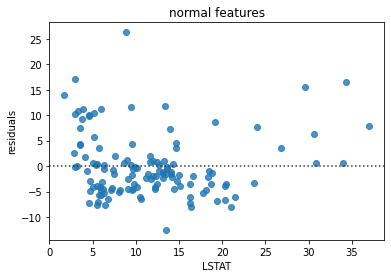

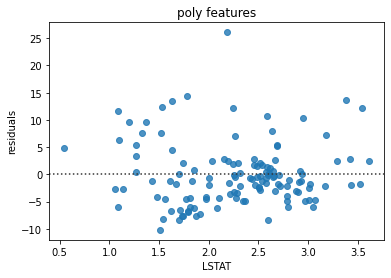

In [9]:
plt.ylabel('residuals')
plt.title('normal features')
sns.residplot(x_test.iloc[:,1],y_test-ypred)
plt.ylabel('residuals')
plt.figure()
plt.ylabel('residuals')
plt.title('poly features')
sns.residplot(xp_test.iloc[:,1],yp_test-poly_pred)
plt.ylabel('residuals')


In [10]:
from sklearn.metrics import mean_squared_error 

In [11]:
print(f'MSE for normal features {mean_squared_error(y_test,y_pred=ypred) }\
    MSE for poly features {mean_squared_error(yp_test,y_pred=poly_pred)}')

MSE for normal features 39.194896461909856    MSE for poly features 33.5903055059191


<h1>SKLEARN</h1>

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
X=pd.DataFrame({"RM":(data['RM']),"LSTAT":(data['LSTAT'])})
y=data["MEDV"]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)

In [24]:
polyreg=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
polyreg.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [25]:
ypred=polyreg.predict(x_test)

In [26]:
ypred.shape

(127,)

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lrpred = lr.predict(x_test)

In [28]:
lr.score(X,y)

0.6374784368385922

In [29]:
polyreg.score(X,y)

0.769071723578585

In [30]:
pd.DataFrame({'Actual':y_test,'POLY Pridicted':ypred,'LR Pridicted':lrpred})


,Actual,POLY Pridicted,LR Pridicted
305,28.4,25.585363,26.354353
193,31.1,30.923565,29.816253
65,23.5,27.224865,27.650605
349,26.6,31.145545,29.899715
151,19.6,16.905229,17.745177
...,...,...,...
493,21.8,18.568831,20.018865
142,13.4,12.609594,8.734019
26,16.6,17.505964,18.656266
173,23.6,24.207177,25.338003


Text(0, 0.5, 'residuals')

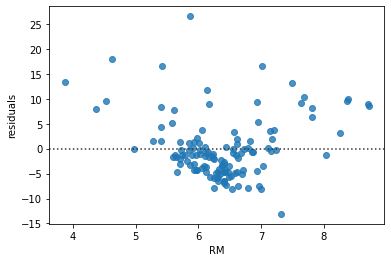

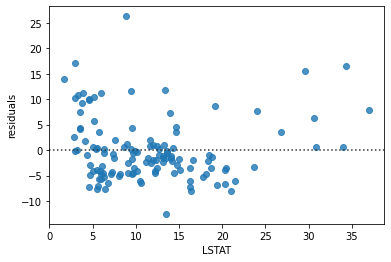

In [31]:
sns.residplot(x_test.iloc[:,0],(y_test-lrpred))
plt.ylabel('residuals')
# print(x_test.shape,ypred.shape)
plt.figure()
sns.residplot(x_test.iloc[:,1],(y_test-lrpred))
plt.ylabel('residuals')


Text(0, 0.5, 'residuals')

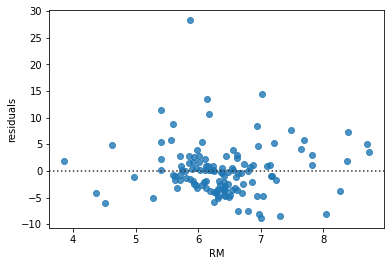

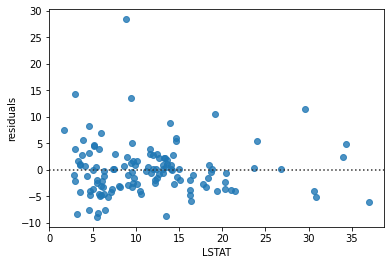

In [32]:
sns.residplot(x_test.iloc[:,0],(y_test-ypred))
plt.ylabel('residuals')
plt.figure()
sns.residplot(x_test.iloc[:,1],(y_test-ypred))
plt.ylabel('residuals')

